In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [4]:
train_df['Name'][1].split(',')[0]

'Cumings'

In [5]:
train_df['title'] = train_df['Name'].apply(lambda x : x.split(',')[0])

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [7]:
test_df = pd.read_csv('test.csv')

In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Post
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs.


In [12]:
train_df['Post'] = train_df['Name'].apply(lambda x : x.split()[1])

In [13]:
test_df['title'] = test_df['Name'].apply(lambda x : x.split(',')[0])

In [20]:
test_df['Post'] = test_df['Name'].apply(lambda x : x.split()[1])

In [21]:
test_df['Post'].value_counts()

Mr.             234
Miss.            77
Mrs.             70
Master.          19
y                 4
Billiard,         2
Col.              2
Rev.              2
Messemaeker,      1
Khalil,           1
Planke,           1
Carlo,            1
Dr.               1
Brito,            1
Ms.               1
Palmquist,        1
Name: Post, dtype: int64

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [23]:
train_df.drop('Cabin', 1, inplace= True)

In [24]:
test_df.drop('Cabin', 1, inplace= True)

In [25]:
def sex(x):
    if x == 'male':
        return 1
    else:
        return 0

In [26]:
train_df['Sex'] = train_df['Sex'].apply(sex)

In [27]:
test_df['Sex'] = test_df['Sex'].apply(sex)

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Post
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Allen,Mr.


In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Post
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,Kelly,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,Wilkes,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,Myles,Mr.
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,Wirz,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,Hirvonen,Mrs.


In [32]:
Emb = pd.get_dummies(train_df['Embarked'], drop_first= True)

In [35]:
train_df = pd.concat([train_df,Emb], axis= 1)

In [37]:
Emb2 = pd.get_dummies(test_df['Embarked'], drop_first= True)

In [39]:
test_df = pd.concat([test_df, Emb2], 1)

In [42]:
job = pd.get_dummies(train_df['Post'], drop_first= True)

In [44]:
train_df = pd.concat([train_df, job], 1)

In [45]:
job2 = pd.get_dummies(test_df['Post'], drop_first= True)

In [46]:
test_df = pd.concat([test_df, job2], 1)

In [50]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'title', 'Post', 'Q', 'S',
       'Capt.', 'Carlo,', 'Col.', 'Cruyssen,', 'Don.', 'Dr.', 'Gordon,',
       'Impe,', 'Jonkheer.', 'Major.', 'Master.', 'Melkebeke,', 'Messemaeker,',
       'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Mulder,',
       'Pelsmaeker,', 'Planke,', 'Rev.', 'Shawah,', 'Steen,', 'Velde,',
       'Walle,', 'der', 'the', 'y'],
      dtype='object')

In [58]:
train_df.drop(['Name', 'title', 'Embarked', 'Post', 'Ticket'], 1, inplace= True)

In [59]:
test_df.drop(['Name', 'title', 'Embarked', 'Post', 'Ticket'], 1, inplace= True)

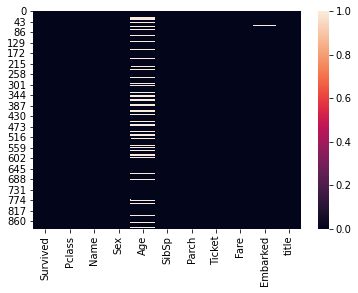

In [95]:
sb.heatmap(train_df.isnull())

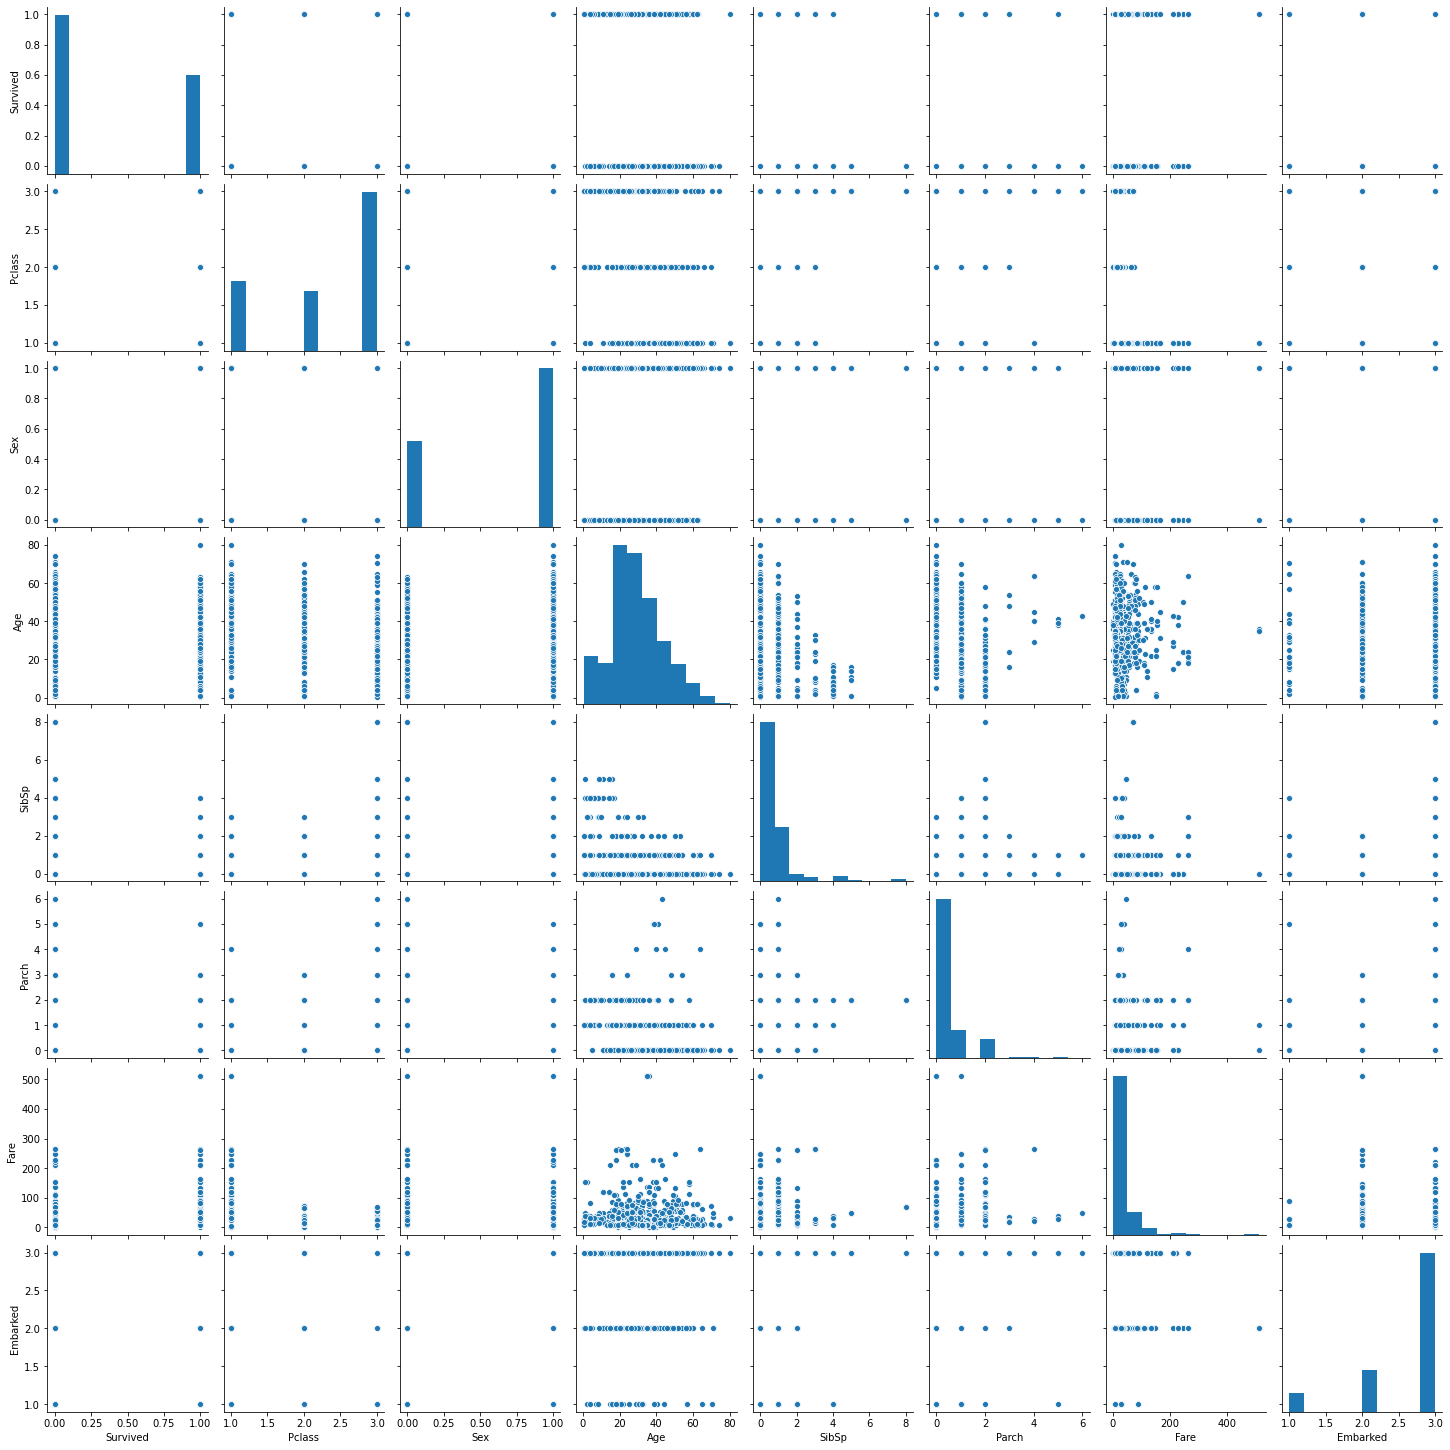

In [96]:
sb.pairplot(train_df)

In [98]:
train_df['Embarked'].fillna(value= '2', inplace= True)

In [100]:
test_df['Embarked'].fillna(value= 1, inplace= True)

In [113]:
train_df['Embarked'] = [int(x) for x in train_df['Embarked']]

In [114]:
train_df['Embarked']

0      3
1      2
2      3
3      3
4      3
      ..
886    3
887    3
888    3
889    2
890    1
Name: Embarked, Length: 891, dtype: int64

In [121]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [122]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [117]:
train_df.drop('title', 1, inplace= True)

In [118]:
test_df.drop('title', 1, inplace= True)

In [119]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [120]:
train_df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

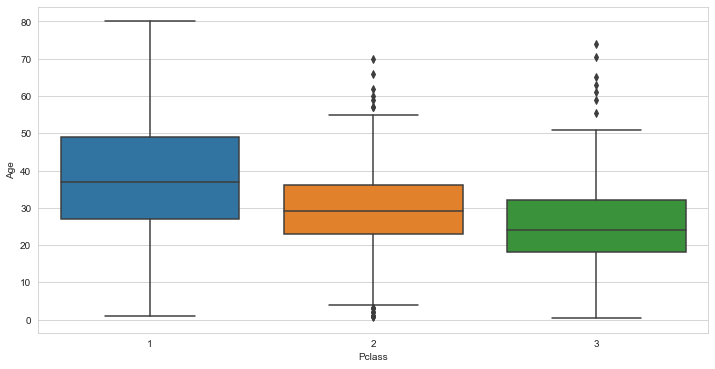

In [134]:
plt.figure(figsize=(12,6))
sb.boxplot(x = train_df['Pclass'], y = train_df['Age'])

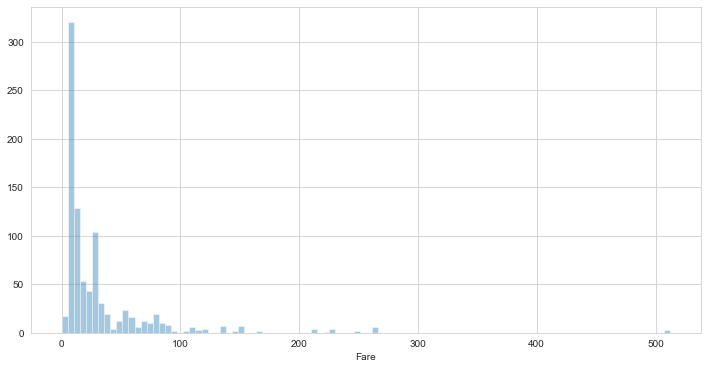

In [131]:
sb.set_style('whitegrid')
plt.figure(figsize=(12,6))
sb.distplot(train_df['Fare'], bins = 100, kde= False)

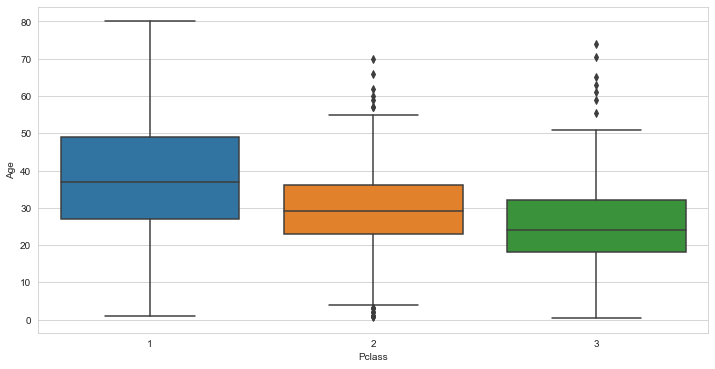

In [135]:
plt.figure(figsize=(12,6))
sb.boxplot(x = train_df['Pclass'], y = train_df['Age'])

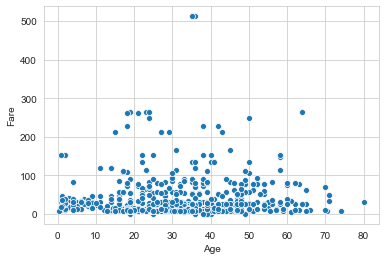

In [136]:
sb.scatterplot(train_df['Age'], train_df['Fare'])

In [60]:
def fila(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return np.random.randint(38, 70)
        
        elif Pclass == 2:
            return np.random.randint(28, 38)
        
        else:
            return np.random.randint(1, 29)
        
    else:
        return Age

In [61]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(fila, axis= 1)

In [62]:
test_df['Age'] = test_df[['Age', 'Pclass']].apply(fila, axis = 1)

In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Sex           418 non-null    int64  
 3   Age           418 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Fare          417 non-null    float64
 7   Q             418 non-null    uint8  
 8   S             418 non-null    uint8  
 9   Brito,        418 non-null    uint8  
 10  Carlo,        418 non-null    uint8  
 11  Col.          418 non-null    uint8  
 12  Dr.           418 non-null    uint8  
 13  Khalil,       418 non-null    uint8  
 14  Master.       418 non-null    uint8  
 15  Messemaeker,  418 non-null    uint8  
 16  Miss.         418 non-null    uint8  
 17  Mr.           418 non-null    uint8  
 18  Mrs.          418 non-null    

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    int64  
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Fare          891 non-null    float64
 8   Q             891 non-null    uint8  
 9   S             891 non-null    uint8  
 10  Capt.         891 non-null    uint8  
 11  Carlo,        891 non-null    uint8  
 12  Col.          891 non-null    uint8  
 13  Cruyssen,     891 non-null    uint8  
 14  Don.          891 non-null    uint8  
 15  Dr.           891 non-null    uint8  
 16  Gordon,       891 non-null    uint8  
 17  Impe,         891 non-null    uint8  
 18  Jonkheer.     891 non-null    

In [67]:
test_df.fillna(value= test_df['Fare'].mean(), inplace= True)

In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Sex           418 non-null    int64  
 3   Age           418 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Fare          418 non-null    float64
 7   Q             418 non-null    uint8  
 8   S             418 non-null    uint8  
 9   Brito,        418 non-null    uint8  
 10  Carlo,        418 non-null    uint8  
 11  Col.          418 non-null    uint8  
 12  Dr.           418 non-null    uint8  
 13  Khalil,       418 non-null    uint8  
 14  Master.       418 non-null    uint8  
 15  Messemaeker,  418 non-null    uint8  
 16  Miss.         418 non-null    uint8  
 17  Mr.           418 non-null    uint8  
 18  Mrs.          418 non-null    

In [76]:
train_df.drop(['Capt.', 'Carlo,', 'Col.', 'Cruyssen,', 'Don.', 'Dr.',
       'Gordon,', 'Impe,', 'Jonkheer.', 'Major.', 'Master.', 'Melkebeke,',
       'Messemaeker,', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.',
       'Mulder,', 'Pelsmaeker,', 'Planke,', 'Rev.', 'Shawah,', 'Steen,',
       'Velde,', 'Walle,', 'der', 'the', 'y'], 1, inplace= True)

In [79]:
test_df.drop(['Brito,', 'Carlo,', 'Col.', 'Dr.', 'Khalil,', 'Master.',
       'Messemaeker,', 'Miss.', 'Mr.', 'Mrs.', 'Ms.', 'Palmquist,', 'Planke,',
       'Rev.', 'y'], 1, inplace= True)

In [77]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q',
       'S', 'Brito,', 'Carlo,', 'Col.', 'Dr.', 'Khalil,', 'Master.',
       'Messemaeker,', 'Miss.', 'Mr.', 'Mrs.', 'Ms.', 'Palmquist,', 'Planke,',
       'Rev.', 'y'],
      dtype='object')

In [69]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
train = scaler.fit_transform(train_df.drop(['Survived', 'PassengerId'], axis = 1))

In [83]:
test = scaler.transform(test_df.drop('PassengerId', 1))

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc = RandomForestClassifier(n_estimators= 300)

In [87]:
rfc.fit(train, train_df['Survived'])

RandomForestClassifier(n_estimators=300)

In [89]:
r_pred = rfc.predict(test)

In [93]:
answers = {'PassengerId': [x for x in test_df['PassengerId']], 'Survived': r_pred}

In [96]:
solnnn = pd.DataFrame(answers)

In [97]:
solnnn.to_csv('My Solution.csv', index= False)

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
log = LogisticRegression()

In [237]:
log.fit(train, train_df['Survived'])

LogisticRegression()

In [242]:
predict = log.predict(test)

In [243]:
predict.shape

(418,)

In [240]:
txt = pd.read_csv('test.csv')

In [267]:
predicted = pd.DataFrame(data = [predict, passe])

In [268]:
predicted

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0,0,0,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0
1,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309


In [250]:
passe = [x for x in txt['PassengerId']]

In [264]:
predicted.to_csv('MYYSubmission.csv',index = False)

In [269]:
result = {'PassengerId': passe, 'Survived' : predict}

{'PassengerId': [892,
  893,
  894,
  895,
  896,
  897,
  898,
  899,
  900,
  901,
  902,
  903,
  904,
  905,
  906,
  907,
  908,
  909,
  910,
  911,
  912,
  913,
  914,
  915,
  916,
  917,
  918,
  919,
  920,
  921,
  922,
  923,
  924,
  925,
  926,
  927,
  928,
  929,
  930,
  931,
  932,
  933,
  934,
  935,
  936,
  937,
  938,
  939,
  940,
  941,
  942,
  943,
  944,
  945,
  946,
  947,
  948,
  949,
  950,
  951,
  952,
  953,
  954,
  955,
  956,
  957,
  958,
  959,
  960,
  961,
  962,
  963,
  964,
  965,
  966,
  967,
  968,
  969,
  970,
  971,
  972,
  973,
  974,
  975,
  976,
  977,
  978,
  979,
  980,
  981,
  982,
  983,
  984,
  985,
  986,
  987,
  988,
  989,
  990,
  991,
  992,
  993,
  994,
  995,
  996,
  997,
  998,
  999,
  1000,
  1001,
  1002,
  1003,
  1004,
  1005,
  1006,
  1007,
  1008,
  1009,
  1010,
  1011,
  1012,
  1013,
  1014,
  1015,
  1016,
  1017,
  1018,
  1019,
  1020,
  1021,
  1022,
  1023,
  1024,
  1025,
  1026,
  1027,
  102

In [271]:
predicted = pd.DataFrame(result)

In [273]:
predicted.to_csv('Submission.csv', index= False)